# Machine Learnign (Summer 2017)

## Warm up homework:

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

> This is very small so you have one week. You can send the associate, SEPARATE notebook to my e-mail. 
If you still have time, you can do it durring this first class.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

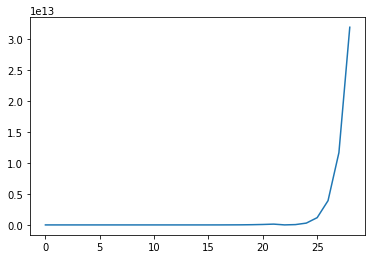

In [70]:
degrees = range(1, 30)
n_samples = 10000
learn_samples = int(n_samples * 0.8)

X = np.sort(np.random.uniform(0, 4*(np.pi), n_samples)) # Features
y = [np.cos(x) for x in X] # Target

# Measurment noise
mu, sigma = 0, 0.25
for i in range(0, len(X)):
    X[i] += np.random.normal(mu, sigma)    

data = [X]    

for _ in degrees:
    data.append(data[-1] * X)
    
matrix = np.matrix(data).transpose()
scaler = StandardScaler()
scaler.fit(matrix)

# scores = [cross_val_score(LinearRegression(), matrix[:,:i], y, cv=5) for i in range(1, 30)]
scores = []
for i in degrees:
    linear_regresion = LinearRegression()
    linear_regresion.fit(matrix[:learn_samples,:i], y[:learn_samples])
    scores.append(mean_squared_error(linear_regresion.predict(matrix[learn_samples:n_samples,:i]), y[learn_samples:n_samples]))

plt.plot(scores)
plt.show()